In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

In [4]:
# !pip install xgboost
# !pip install seaborn
# !pip install scikit-learn
# !pip install matplotlib

# !pip install pandas

In [5]:
big_mart= pd.read_csv('BigMartDataSales.csv')
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
big_mart.shape

(8523, 12)

In [7]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features  (strings):

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

In [8]:
big_mart.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

we will find the mean() --->  average value and put this means value to the NAN value.
mode -----> most repeated value
item_weights = is column mien tu hum mean find kar k missing value ki jaga put kar dien gy.lakin
outlet_size=  is a categorical feature is mien hum mean nahi find kar sakty is mien hum mode fine karien gy matln jo value sb say zyada bar ae hai us ko find karien gy aur missing value ki jaga put kar dien gy.

In [9]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(),inplace=True)

C:\Users\aser\AppData\Local\Temp\ipykernel_1040\4099026310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(),inplace=True)


In [10]:
big_mart.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# find the mode values in "Outlet_Size" column with respect to outlet_type.
mode_of_Outlet_size=big_mart.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
# x represent the outlet_size column and x.mode() is the mode of outlet_size according to outlet_type.
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


#this is a mode of different type of outlets. matlb crocery store mien zyada ter small size a raha hai.aur supper market type1 mien zyada ter small a raha hai.aur supper market type 2 mien zyada ter medium a raha hai.inshort ye humien mode btati hai w.r.t outlet type. -->

In [12]:
def impute_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        return mode_of_Outlet_size[row['Outlet_Type']]
    else:
        return row['Outlet_Size']

big_mart['Outlet_Size'] = big_mart.apply(impute_outlet_size, axis=1)


In [13]:
big_mart.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

hum apni missing value ko is overall mode say nahi replace karien gy balk kise asy column k sath is ko corelate karien gy aur pher us column k according hum mode find karien gy.then we will fill thouse mode value is place of missing values.

hum ny outlet_size k sath outlet_type wala column kiun liya kiun k ye dono apis mien corelated hain.

ab hum find outlet size mien missing value ko over all mode say nahi balk outlet_type k according fill karien gy.e.g. agar missing value k against outlet_type grocery hai tu wahan per small fill ho ga aur jahn per supper market type 2 hai wahan per mdeium fill ho ga.

# Data Analysis

In [14]:
big_mart.describe()
#will show only numarical value columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
big_mart['Outlet_Size'] = big_mart['Outlet_Size'].astype(str)

big_mart['Outlet_Size'].apply(type).value_counts()


Outlet_Size
<class 'str'>    8523
Name: count, dtype: int64

Numerical Features

Numerical Features


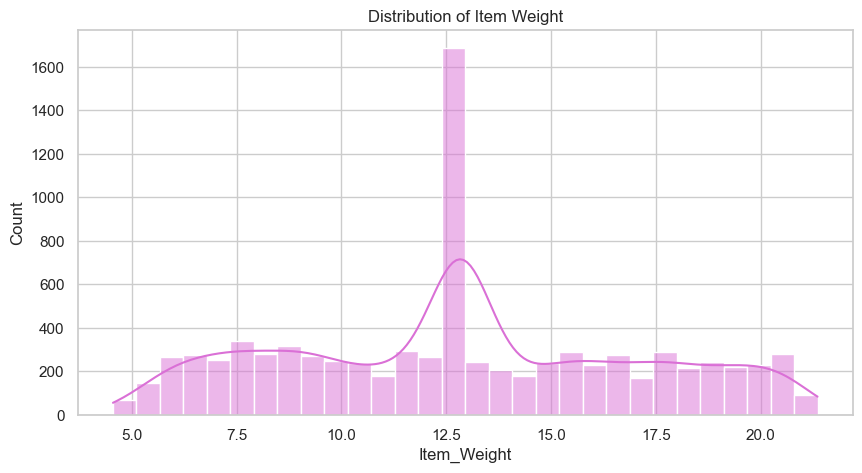

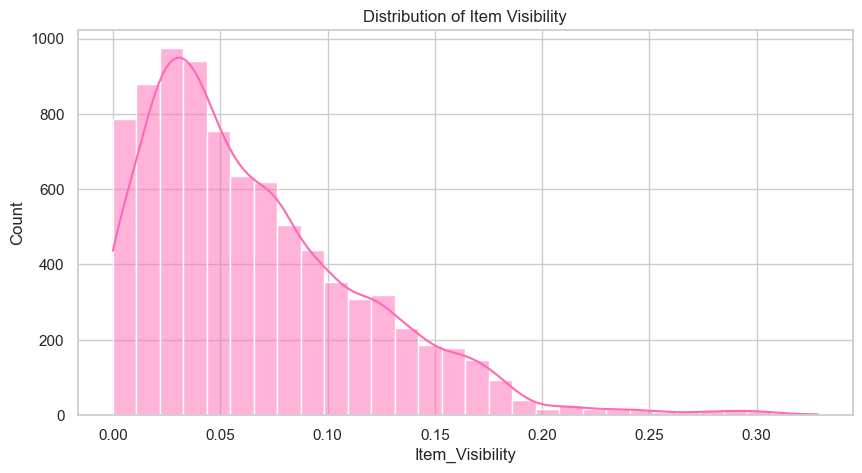

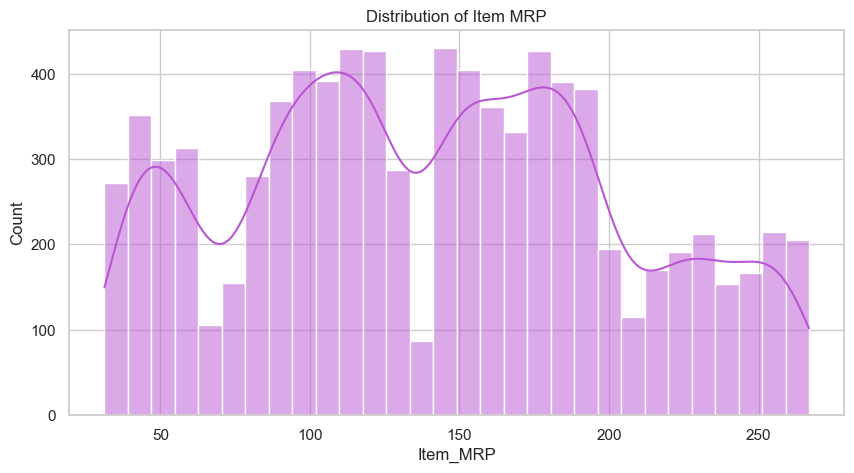

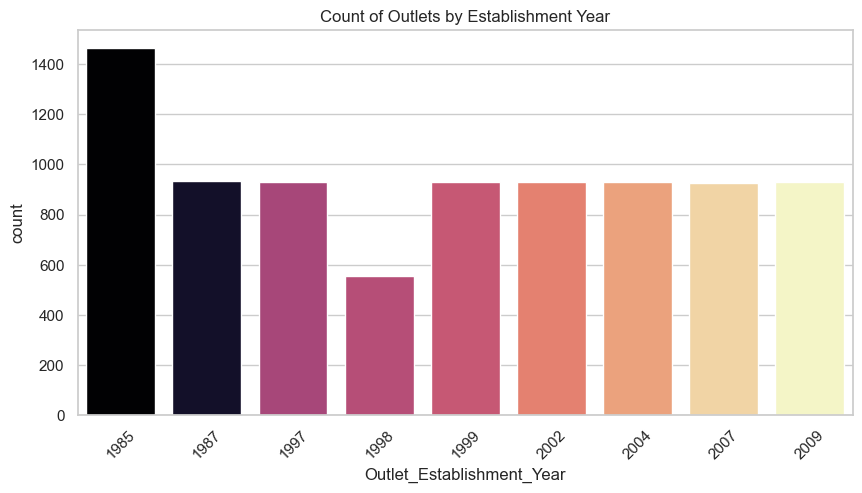

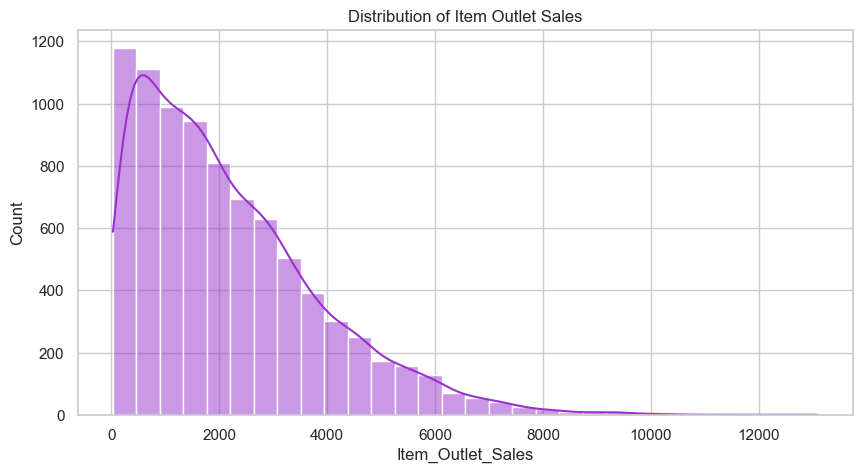

Categorical Features


C:\Users\aser\AppData\Local\Temp\ipykernel_1040\333779026.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=big_mart, estimator='mean', errorbar=None, palette='magma')


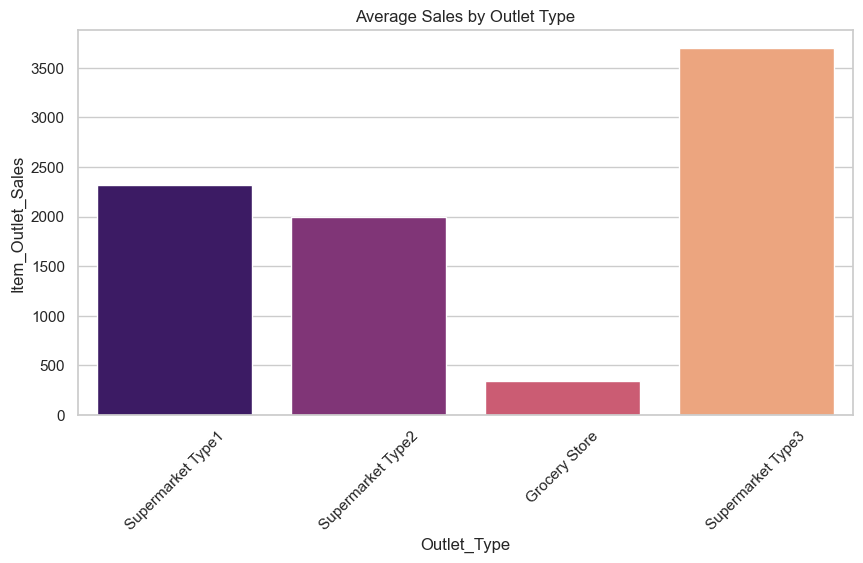

C:\Users\aser\AppData\Local\Temp\ipykernel_1040\333779026.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type', data=big_mart, palette='magma')


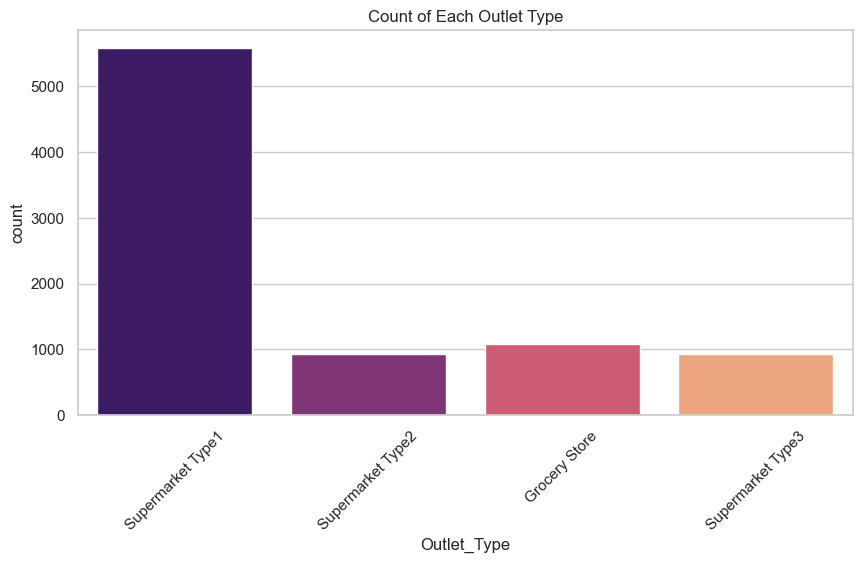

C:\Users\aser\AppData\Local\Temp\ipykernel_1040\333779026.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=big_mart, palette='magma')


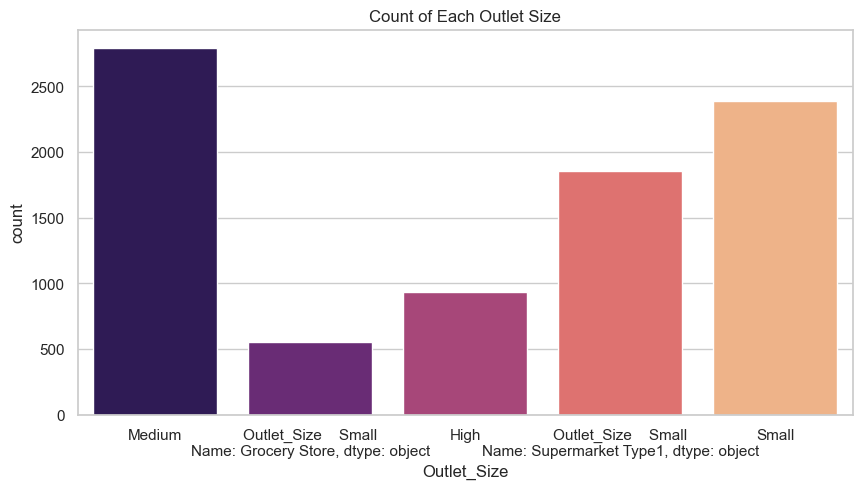

C:\Users\aser\AppData\Local\Temp\ipykernel_1040\333779026.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=big_mart, palette='magma')


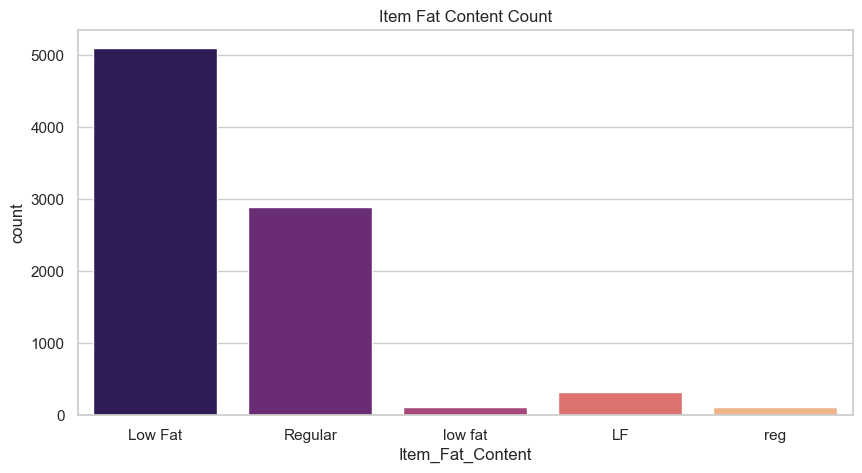

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set(style="whitegrid")

# Increase default plot size
plt.rcParams["figure.figsize"] = (10, 5)

print("Numerical Features")

# --- 1. Item_Weight ---
plt.figure()
sns.histplot(big_mart['Item_Weight'], bins=30, kde=True, color='#DA70D6')  # orchid
plt.title('Distribution of Item Weight')
plt.show()

# --- 2. Item_Visibility ---
plt.figure()
sns.histplot(big_mart['Item_Visibility'], bins=30, kde=True, color='#FF69B4')  # hot pink
plt.title('Distribution of Item Visibility')
plt.show()

# --- 3. Item_MRP ---
plt.figure()
sns.histplot(big_mart['Item_MRP'], bins=30, kde=True, color='#BA55D3')  # medium orchid
plt.title('Distribution of Item MRP')
plt.show()

# --- 4. Outlet_Establishment_Year ---
plt.figure()
sns.countplot(x='Outlet_Establishment_Year', data=big_mart, palette='magma', hue='Outlet_Establishment_Year', legend=False)
plt.title('Count of Outlets by Establishment Year')
plt.xticks(rotation=45)
plt.show()

# --- 5. Item_Outlet_Sales ---
plt.figure()
sns.histplot(big_mart['Item_Outlet_Sales'], bins=30, kde=True, color='#9932CC')  # dark orchid
plt.title('Distribution of Item Outlet Sales')
plt.show()

print("Categorical Features")

# Average sales per outlet type
plt.figure()
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=big_mart, estimator='mean', errorbar=None, palette='magma')
plt.title('Average Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

# --- 6. Outlet_Type ---
plt.figure()
sns.countplot(x='Outlet_Type', data=big_mart, palette='magma')
plt.title('Count of Each Outlet Type')
plt.xticks(rotation=45)
plt.show()

# # # --- 7. Outlet_Size ---
plt.figure()
sns.countplot(x='Outlet_Size', data=big_mart, palette='magma')
plt.title('Count of Each Outlet Size')
plt.show()

# --- 8. Item_Fat_Content ---
plt.figure()
sns.countplot(x='Item_Fat_Content', data=big_mart, palette='magma')
plt.title('Item Fat Content Count')
plt.show()


# Data Pre-Processing

In [17]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,"Outlet_Size Small\nName: Grocery Store, dty...",Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
big_mart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [19]:
#ye hum daikh sakty hain k regular ko reg b likha hua hai low fat ko  lf b likha hua hai hum is ko set karty hain.
big_mart.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

C:\Users\aser\AppData\Local\Temp\ipykernel_1040\4283104041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=big_mart, palette='magma')


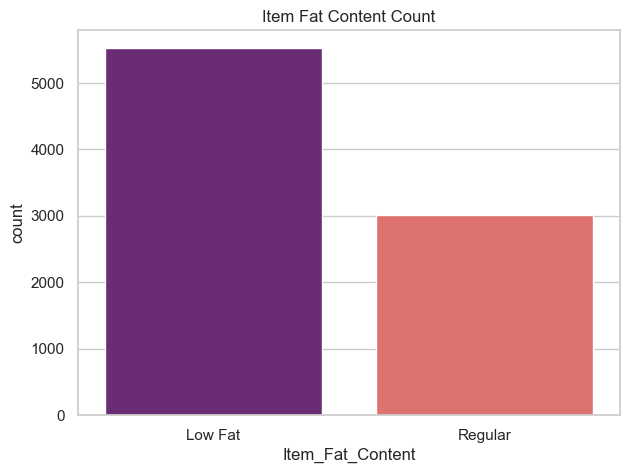

In [20]:
big_mart['Item_Fat_Content'].value_counts()
# Set a consistent style
sns.set(style="whitegrid")

# Increase default plot size
plt.rcParams["figure.figsize"] = (7, 5)
# --- 8. Item_Fat_Content ---
plt.figure()
sns.countplot(x='Item_Fat_Content', data=big_mart, palette='magma')
plt.title('Item Fat Content Count')
plt.show()


# Label Encoding

In [21]:
#we are going to take all categorical value and transfer them into some categorical values

In [22]:
encoder =LabelEncoder()

In [23]:
big_mart['Item_Identifier']=encoder.fit_transform(big_mart['Item_Identifier'])
big_mart['Item_Fat_Content']=encoder.fit_transform(big_mart['Item_Fat_Content'])
big_mart['Item_Type']=encoder.fit_transform(big_mart['Item_Type'])
big_mart['Outlet_Identifier'] = encoder.fit_transform(big_mart['Outlet_Identifier'])
big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])
big_mart['Outlet_Location_Type'] = encoder.fit_transform(big_mart['Outlet_Location_Type'])
big_mart['Outlet_Type'] = encoder.fit_transform(big_mart['Outlet_Type'])

In [24]:
# big_mart.drop('Item_Identifier', axis=1, inplace=True)
# print(big_mart.columns)


In [25]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [70]:
# Split features and target
X = big_mart.drop(columns='Item_Outlet_Sales', axis=1)
y = big_mart['Item_Outlet_Sales']

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


In [72]:

print("Full Dataset Shape:", X.shape)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Full Dataset Shape: (8523, 11)
Train Shape: (6392, 11)
Test Shape: (2131, 11)


# Normalization

In [73]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Machine Learning Model Training

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# -------- LINEAR REGRESSION --------
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
y_pred_lr = linear_model.predict(X_test_scaled)


# Model Evaluation

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Evaluation:")
print(f"MAE  : {mae_lr:.2f}")
print(f"MSE  : {mse_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")


Linear Regression Evaluation:
MAE  : 922.98
MSE  : 1519157.01
RMSE : 1232.54
R² Score: 0.4864


# XGBoost Model


## Machine Learning Model Training

In [78]:
import xgboost as xgb


# -------- XGBOOST REGRESSOR --------
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [79]:
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

## Model Evaluation

In [81]:
# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor Evaluation:")
print(f"MAE  : {mae_xgb:.2f}")
print(f"MSE  : {mse_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")


XGBoost Regressor Evaluation:
MAE  : 783.19
MSE  : 1276125.72
RMSE : 1129.66
R² Score: 0.5686


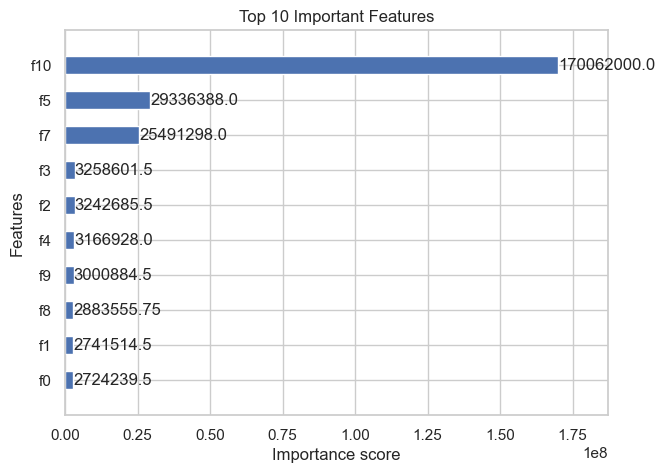

In [83]:
# -------- FEATURE IMPORTANCE --------
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, height=0.5)
plt.title("Top 10 Important Features")
plt.show()